# Regressão aplicada a dados de saturação de água


## Etapa 1: carregamento de dados e pré-processamento
>  Inicialmente irei usar dois tipos de dados: 
> > * Dados1: é com dados calculados do livro do schon, desses dados, temos os perfis de profundidade (depth),  radioatividade (GR), densidade (RHOB), porosidade neutronica (NPHI), resistividade (RES-DEEP), Vsh (VSH), saturação de água (SW) e porosidade de densidade (DPHI-SS), essas ultimas 3 foram calculadas a partir das anteriores e considerando alguns fatores. Dentre os perfis que utilizaremos, o perfil de SW é calculado diretamente da equação de archi com parametros definidos como *Rw=0,03*, *m=1,96* e *n=2,19*
> > * Dados2: é com os dados experimentais e retirados de um poço em Wyoming. Neste, temos dados de profundidade (DEPTH), porosidade sonica (PHI), resistividade (RES) e saturação de água (SW).


> Começaremos fazendo o treinamento da rede através dos dados1

In [92]:
#Bibliotecas que poderão ser usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from welly import Well
import lasio

In [93]:
# Vamos ler o arquivo csv direto com o pandas
dados1 = pd.read_csv('C:/Users/horac/Desktop/masters_project/dados1.csv',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
dados1#,dados2
#dados1=dados1.iloc[21:176,:]
#dados1 = dados1.reset_index(drop = True)

,DEPTH,GR,NPHI,RES-DEEP,SW
0,623.47,40.6,0.051,12.64,0.452596
1,623.62,39.4,0.052,12.73,0.451099
2,623.77,39.6,0.055,12.53,0.454389
3,623.93,41.4,0.058,12.12,0.440224
4,624.08,42.3,0.063,11.85,0.471115
...,...,...,...,...,...
170,649.38,28.6,0.104,0.84,0.959376
171,649.53,26.7,0.102,0.84,1.011385
172,649.68,25.4,0.104,0.84,1.054971
173,649.83,25.2,0.105,0.83,1.168677


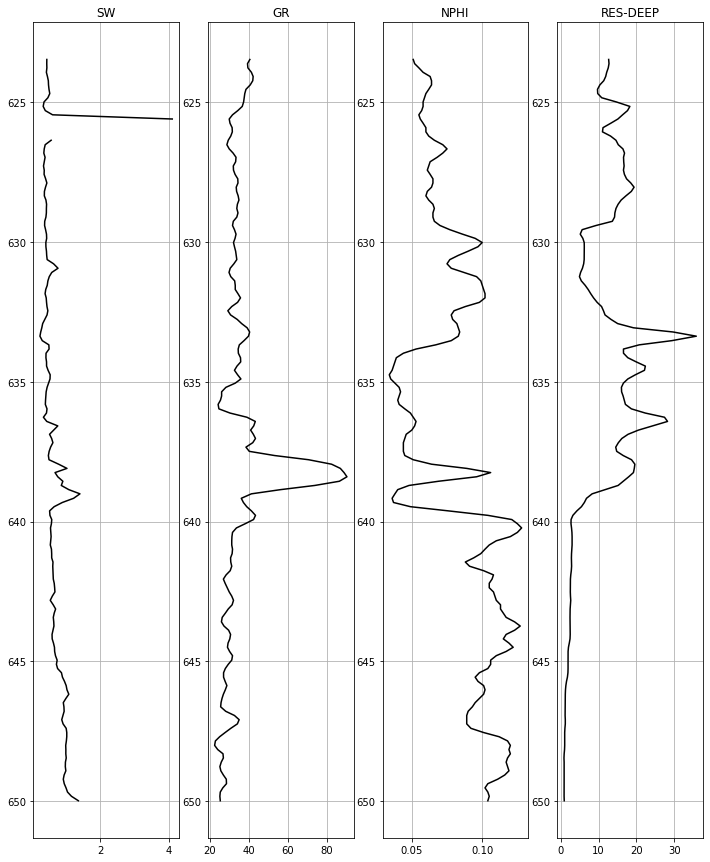

In [94]:
# Plotando para visualizar os perfis
#plt.figure(figsize = (2, 10))
#plt.plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax = plt.gca()


fig, ax = plt.subplots(1,4,figsize=(12,15))
ax[0].plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SW')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(dados1['GR'],dados1['DEPTH'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('GR')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

ax[2].plot(dados1['NPHI'],dados1['DEPTH'],color='k')
#ax[2].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[2].title.set_text('NPHI')
ax[2].grid()
#ax[2].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[2].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[2].invert_yaxis()

ax[3].plot(dados1['RES-DEEP'],dados1['DEPTH'],color='k')
#ax[3].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[3].title.set_text('RES-DEEP')
ax[3].grid()
#ax[3].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[3].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[3].invert_yaxis()


In [95]:
# Como temos um problema com os dados ali no começo do perfil de saturação, foi identificado a localização de NaN e vamos retirar esses dados que são prejudiciais
dados1=dados1.iloc[21:176,:]
dados1 = dados1.reset_index(drop = True)

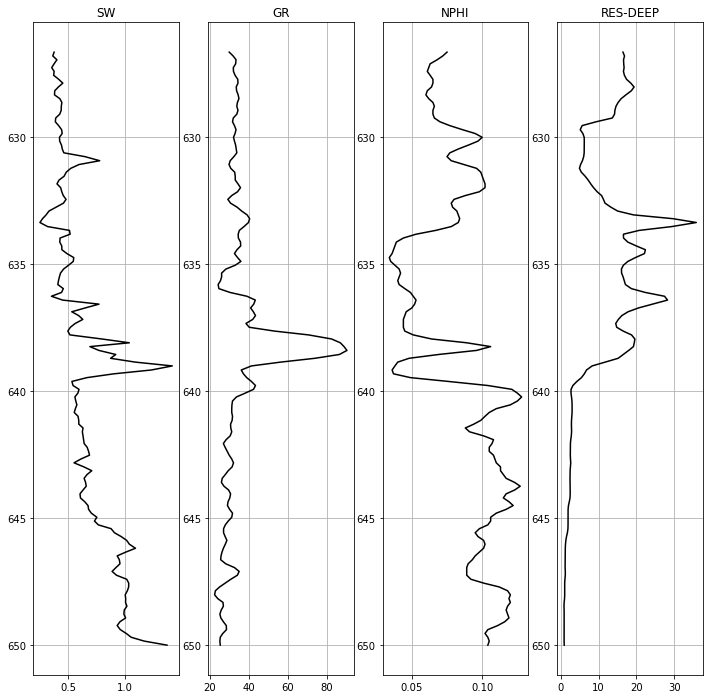

In [96]:
#Plotando para visualizar agora sem os dados corrompidos
fig, ax = plt.subplots(1,4,figsize=(12,12))
ax[0].plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SW')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(dados1['GR'],dados1['DEPTH'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('GR')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

ax[2].plot(dados1['NPHI'],dados1['DEPTH'],color='k')
#ax[2].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[2].title.set_text('NPHI')
ax[2].grid()
#ax[2].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[2].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[2].invert_yaxis()

ax[3].plot(dados1['RES-DEEP'],dados1['DEPTH'],color='k')
#ax[3].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[3].title.set_text('RES-DEEP')
ax[3].grid()
#ax[3].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[3].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[3].invert_yaxis()

## Etapa 2: Criando modelo de regressão normal
> * Essa é a primeira tentativa de uso de regressão pelo tensorflow, sem muito processamento dos dados, feito somente para teste inicial.

In [97]:
# Importando tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

In [98]:
dados1.columns

Index(['DEPTH', 'GR', 'NPHI', 'RES-DEEP', 'SW'], dtype='object')

In [99]:
# Gerando os dados de entrada
x1 = dados1[['NPHI','RES-DEEP']]
y1 = dados1[['SW']]

# Como a resistividade está com valores muito acima da porosidade, temos que normalizar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x1[['NPHI','RES-DEEP']] = scaler.fit_transform(x1[['NPHI','RES-DEEP']])

<ipython-input-99-a20bbcae263b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[['NPHI','RES-DEEP']] = scaler.fit_transform(x1[['NPHI','RES-DEEP']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [100]:
# Utilizando a função train_test_split (sklearn) para dividir de forma aleatória os elementos dos
# dados 
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [101]:
# Gerando o modelo
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(75, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')                        
])

# Compiling the model
model1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['mae'])

# Fitting the model

history1 = model1.fit(x1_train, y1_train,
                      epochs=1000, 
                      validation_data=(x1_test, y1_test), 
                      callbacks = [callback],
                      validation_split = 0.5)

Epoch 1/1000
2/2 [==============================] - 0s 92ms/step - loss: 0.5172 - mae: 0.5172 - val_loss: 0.2039 - val_mae: 0.2039
Epoch 2/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2697 - mae: 0.2697 - val_loss: 0.3026 - val_mae: 0.3026
Epoch 3/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.2850 - mae: 0.2850 - val_loss: 0.1943 - val_mae: 0.1943
Epoch 4/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1927 - mae: 0.1927 - val_loss: 0.2102 - val_mae: 0.2102
Epoch 5/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2382 - mae: 0.2382 - val_loss: 0.2260 - val_mae: 0.2260
Epoch 6/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2290 - mae: 0.2290 - val_loss: 0.1795 - val_mae: 0.1795
Epoch 7/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1943 - mae: 0.1943 - val_loss: 0.1823 - val_mae: 0.1823
Epoch 8/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.1962 - m

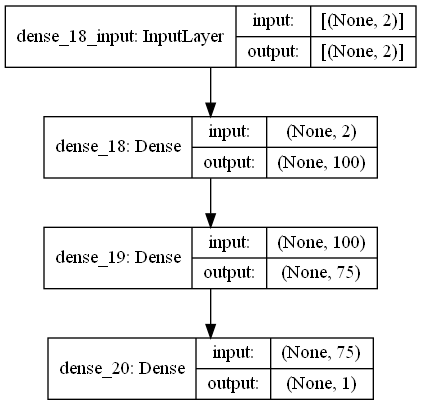

In [102]:
from tensorflow.keras.utils import plot_model
plot_model(model1, show_shapes=True)

In [103]:
# Avaliando o modelo
model1.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 12ms/step - loss: 0.0910 - mae: 0.0910


[0.09095072001218796, 0.09095072001218796]

Text(0, 0.5, 'Loss')

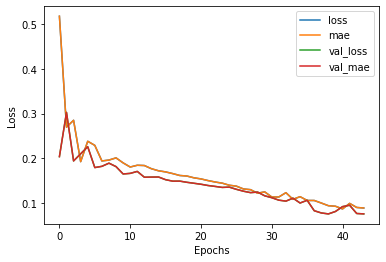

In [104]:
pd.DataFrame(history1.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [105]:
pred = model1.predict(x1)

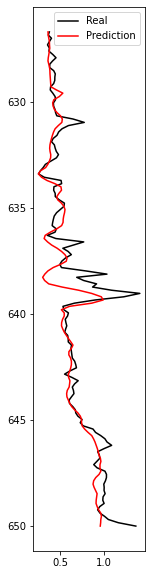

In [106]:
# Figura para comparar o dado real com o calculado
plt.figure(figsize = (2, 10))

plt.plot(dados1['SW'], dados1['DEPTH'], color = 'k')
plt.plot(pred, dados1['DEPTH'], color = 'red')

plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well1['Depth'][0],well1['Depth'][len(well1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()

## Etapa 3: Aplicando o modelo em dados de teste
> * Para testar o dado treinado na rede de regressão, vamos usar os dados2, que são dados experimentais tirados em laboratório

In [107]:
# Inicialmente vamos ler os dados
dados2 = pd.read_csv('C:/Users/horac/Desktop/masters_project/dados2.csv',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
dados2

,DEPTH,PHI,RES,SW
0,5456.1,0.0011,860.68518,6.1
1,5456.3,0.0008,677.43329,8.9
2,5458.5,0.0176,276.09280,10.6
3,5462.8,0.0091,439.26807,10.2
4,5465.4,0.0868,42.47038,23.2
5,5514.6,0.1521,77.73200,48.7
6,5517.8,0.1955,29.97581,9.0
7,5518.7,0.1674,33.86389,33.6
8,5519.2,0.1571,34.34479,6.8
9,5519.3,0.1483,75.46670,7.5


In [108]:
x2 = dados2[['PHI','RES']]
y2 = dados2[['SW']] / 100

x2[['RES']] = scaler.fit_transform(x2[['RES']])
x2[['PHI']] = scaler.fit_transform(x2[['PHI']])
#y2[['SW']] = scaler.fit_transform(y2[['SW']])

<ipython-input-108-578fd19f6d82>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[['RES']] = scaler.fit_transform(x2[['RES']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [109]:
pred2 = model1.predict(x2)
pred2, y2

(array([[0.33557144],
        [0.41403663],
        [0.7148197 ],
        [0.51411796],
        [0.9738044 ],
        [0.5658053 ],
        [0.8890148 ],
        [0.9045637 ],
        [0.9184504 ],
        [0.5898769 ],
        [0.9244067 ],
        [0.8732609 ]], dtype=float32),
        SW
 0   0.061
 1   0.089
 2   0.106
 3   0.102
 4   0.232
 5   0.487
 6   0.090
 7   0.336
 8   0.068
 9   0.075
 10  0.445
 11  0.246)

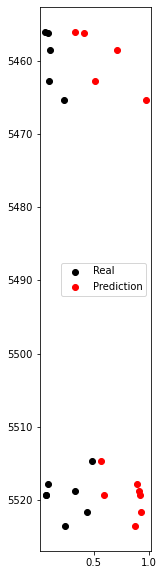

In [110]:
plt.figure(figsize = (2, 10))

plt.scatter(y2, dados2['DEPTH'], color = 'k')
plt.scatter(pred2, dados2['DEPTH'], color = 'red')

plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well1['Depth'][0],well1['Depth'][len(well1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()

> * Vamos aplicar o modelo no dado normal do poço para comparar com os valores tanto do dado experimental quanto da calculada a partir do experimental. Para isso, vamos ler o arquivo ``pex_ait_hrlt_bhc48X_28ondepth.las``, que contém os perfis de resisitividade e porosidade

In [111]:
# Usamos diretamente do welly uma função para ler o arquivo .las
well1_welly = Well.from_las('C:/Users/horac/Desktop/masters_project/pex_ait_hrlt_bhc48X_28ondepth.las', index='ft')


In [112]:
# Vamos visualizar os perfis que temos
well1_welly.data

{'TENS': Curve([  nan,  858.,  858., ..., 1453., 1391.,   nan]),
 'CS': Curve([      nan, 1654.6826, 1654.6826, ..., 2170.647 , 2113.9165,
              nan]),
 'CDF': Curve([     nan, 681.138 , 681.138 , ...,  -3.9105,  14.22  ,      nan]),
 'SP': Curve([      nan, -219.9375, -219.9375, ...,  152.9375,  152.9375,
              nan]),
 'GDEV': Curve([   nan, 2.8998, 2.9165, ...,    nan,    nan,    nan]),
 'HCAL': Curve([   nan, 7.7076, 7.7076, ..., 2.9343, 2.9343,    nan]),
 'HDRA': Curve([   nan, 0.1775, 0.1775, ...,    nan,    nan,    nan]),
 'RXO8': Curve([   nan, 0.2849, 0.2849, ..., 1.0576, 1.0656,    nan]),
 'RXOZ': Curve([   nan, 0.2849, 0.2849, ..., 1.0601, 1.0621,    nan]),
 'HMIN': Curve([   nan, 0.2931, 0.2931, ..., 0.0949, 0.0947,    nan]),
 'HMNO': Curve([   nan, 0.2383, 0.2383, ..., 0.1336, 0.1334,    nan]),
 'AHT10': Curve([   nan, 7.1886, 7.1886, ..., 0.0667, 0.0667,    nan]),
 'AHT20': Curve([   nan, 8.0326, 8.0326, ..., 0.0667, 0.0667,    nan]),
 'AHT30': Curve([    n

In [113]:
# Aplicando despike
well1_welly.data['SPHI_DESPIKED'] = well1_welly.data['SPHI'].despike(window_length = 70, z =2)
well1_welly.data['RT_DESPIKED'] = well1_welly.data['RT_HRLT'].despike(window_length=70, z=2)

In [114]:
# Vamos converter para pandas apenas os perfis que queremos, que são o SPHI e o RT_HRLT.
# Usamos também o reset_index(drop = False) para zerar os indíces dos perfis, gerando a coluna de depth.
well1 = well1_welly.df(['SPHI', 'RT_HRLT','SPHI_DESPIKED','RT_DESPIKED'])
well1 = well1.reset_index(drop = False)
well1

,Depth,SPHI,RT_HRLT,SPHI_DESPIKED,RT_DESPIKED
0,452.7,NaN,0.11538,NaN,0.11538
1,453.2,0.4395,0.11538,0.4395,0.11538
2,453.7,0.4395,0.11538,0.4395,0.11538
3,454.2,0.4395,0.11538,0.4395,0.11538
4,454.7,0.4395,0.11538,0.4395,0.11538
...,...,...,...,...,...
10628,5766.7,-0.0563,54.00268,-0.0563,54.00268
10629,5767.2,-0.0563,54.00320,-0.0563,54.00320
10630,5767.7,-0.0563,54.00693,-0.0563,54.00693
10631,5768.2,-0.0563,NaN,-0.0563,NaN


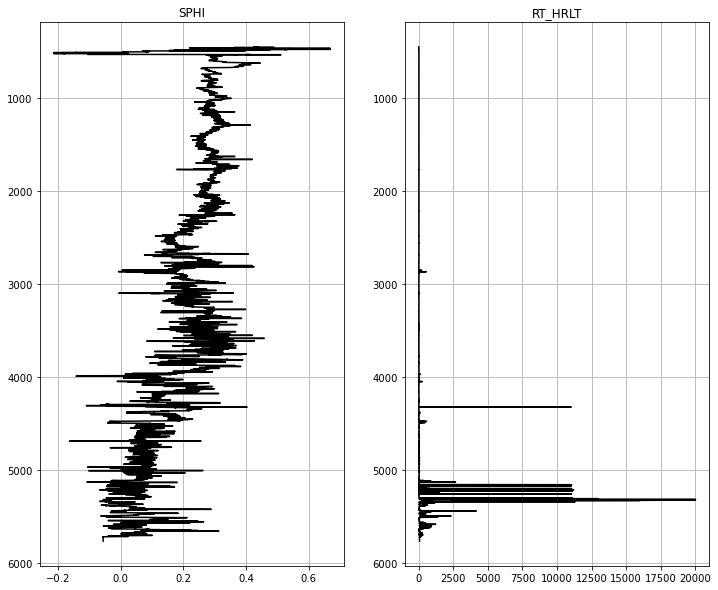

In [115]:
#Plotando para visualizar os dois perfis
fig, ax = plt.subplots(1,2,figsize=(12,10))
ax[0].plot(well1['SPHI_DESPIKED'],well1['Depth'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SPHI')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(well1['RT_DESPIKED'],well1['Depth'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('RT_HRLT')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

In [116]:
# O poço é grande, mas só utilizaremos uma pequena parte dele, que é a proximidade do reservatório onde está localizado os dados experimentais.
# Portanto, vamos fazer o slice do dado numa profundidade aproximada de onde foram tirados os dados experimentais.
ia = well1.index[well1['Depth'] == 5400.2]
ib = well1.index[well1['Depth'] == 5550.7]
#ia,ib
well1 = well1.iloc[9895:10196,:]
well1 = well1.reset_index(drop = True)
well1

,Depth,SPHI,RT_HRLT,SPHI_DESPIKED,RT_DESPIKED
0,5400.2,0.0267,37.11008,0.0267,37.11008
1,5400.7,0.0406,32.99814,0.0406,32.99814
2,5401.2,0.0465,30.09413,0.0465,30.09413
3,5401.7,0.0482,30.47871,0.0482,30.47871
4,5402.2,0.0502,31.52243,0.0502,31.52243
...,...,...,...,...,...
296,5548.2,0.1157,36.27018,0.1157,36.27018
297,5548.7,0.1171,35.11890,0.1171,35.11890
298,5549.2,0.1262,34.40559,0.1262,34.40559
299,5549.7,0.1223,37.27995,0.1223,37.27995


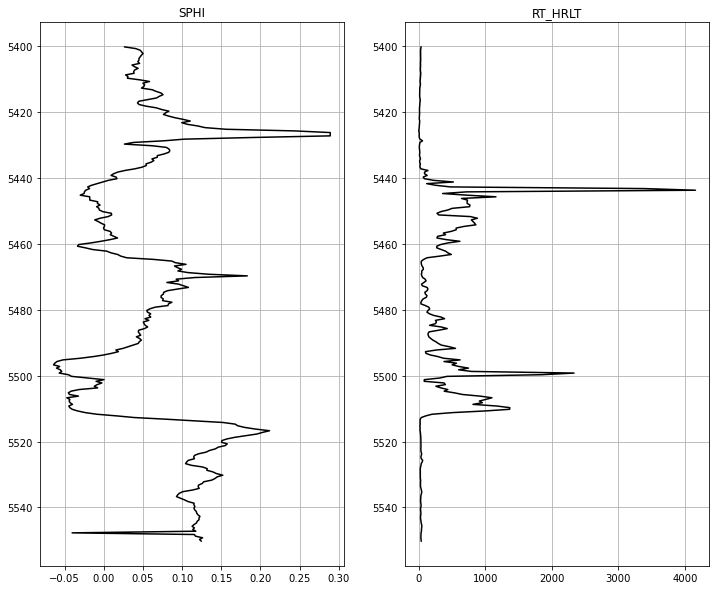

In [117]:
#Plotando para visualizar os dois perfis depois do slice
fig, ax = plt.subplots(1,2,figsize=(12,10))
ax[0].plot(well1['SPHI_DESPIKED'],well1['Depth'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SPHI')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(well1['RT_DESPIKED'],well1['Depth'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('RT_HRLT')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

In [118]:
x3 = well1[['SPHI_DESPIKED','RT_DESPIKED']]
#y3 = dados2[['SW']] / 100

x3[['RT_DESPIKED']] = scaler.fit_transform(x3[['RT_DESPIKED']])
x3[['SPHI_DESPIKED']] = scaler.fit_transform(x3[['SPHI_DESPIKED']])

<ipython-input-118-01859ae2da92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x3[['RT_DESPIKED']] = scaler.fit_transform(x3[['RT_DESPIKED']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [119]:
pred3 = model1.predict(x3)
pred3

array([[1.1615224 ],
       [1.1321955 ],
       [1.1215904 ],
       [1.1165918 ],
       [1.1093484 ],
       [1.1144556 ],
       [1.1192102 ],
       [1.1239557 ],
       [1.123119  ],
       [1.1300691 ],
       [1.1256714 ],
       [1.1483768 ],
       [1.1423315 ],
       [1.13275   ],
       [1.1452631 ],
       [1.1422306 ],
       [1.1368126 ],
       [1.1684376 ],
       [1.1650918 ],
       [1.1714875 ],
       [1.1349112 ],
       [1.1014099 ],
       [1.1172118 ],
       [1.1101875 ],
       [1.1220653 ],
       [1.1358638 ],
       [1.1002414 ],
       [1.084921  ],
       [1.0755839 ],
       [1.0769333 ],
       [1.0802172 ],
       [1.0789313 ],
       [1.1052167 ],
       [1.1365583 ],
       [1.146893  ],
       [1.1427358 ],
       [1.1243013 ],
       [1.090784  ],
       [1.0817585 ],
       [1.0715957 ],
       [1.0721973 ],
       [1.0791733 ],
       [1.072876  ],
       [1.0682048 ],
       [1.056958  ],
       [1.0376612 ],
       [1.0527991 ],
       [1.048

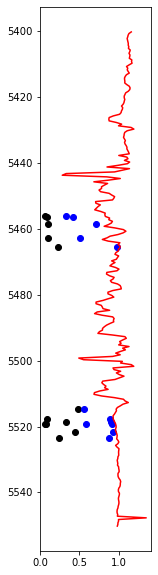

In [120]:
plt.figure(figsize = (2, 10))

plt.scatter(y2, dados2['DEPTH'], color = 'k')
plt.plot(pred3, well1['Depth'], color = 'red')
plt.scatter(pred2, dados2['DEPTH'], color = 'blue')

#plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well1['Depth'][0],well1['Depth'][len(well1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()

## Etapa 4: Novo treinamento
> * Como na etapa anterior os dados não foram bons o suficiente para o treinamento, a partir de agora utilizaremos dados sintéticos a partir de um modelo visto no livro Physical Properties of Rocks: A workbook. Nele, temos um exemplo de equação para reservatórios no qual o Vsh é menor que 0.3, indicando um reservatório no qual é possivel obter saturação de água. para esse primeiro teste ja considerarei a região do reservatório como a descrita no perfil do well1, entre as profundidades de 5400 e 5550. Para esse cálculo, usaremos a fórmula `SW = (Rw/(Rt*phi^m))^n` no qual Rw=0.03, m=1.96 e n=2.19
> * Nova informação: Foi achado um dado com perfis de Sw (efetiva e total), porosidade e resistividade. O nome do dado está como `dado_LosLobos2.las` e usaremos ele para treinar inicialmente nossa rede. Faremos dois modelos de regressão, um para Swe e outra pra Swt. Depois, iremos comparar com a fórmula dita no primeiro item e analisar os resultados

### Pré-processamento dos dados

In [121]:
well2_welly = Well.from_las('C:/Users/horac/Desktop/masters_project/dado_LosLobos2.las', index='ft')


In [122]:
well2_welly.data

{'CALI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'NPHI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DPHI:1': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DRHO': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'SP': Curve([    nan,     nan,     nan, ..., -34.795, -34.813, -34.831]),
 'ILD': Curve([  nan,   nan,   nan, ..., 2.088, 2.087, 2.09 ]),
 'ILM': Curve([  nan,   nan,   nan, ..., 2.296, 2.303, 2.293]),
 'LL8U': Curve([  nan,   nan,   nan, ..., 2.547, 2.559, 2.563]),
 'DT': Curve([   nan,    nan,    nan, ..., 123.77, 123.79, 123.77]),
 'ROP': Curve([53.777, 52.58 , 51.85 , ..., 73.   , 73.085, 73.418]),
 'GASR': Curve([  nan,   nan, 0.261, ..., 1.866, 1.845, 1.825]),
 'C1R': Curve([  nan, 2.034, 2.034, ..., 6.702, 6.705, 6.704]),
 'C2R': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'C3R': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'C4R': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'KSCI': Curve([nan, nan, nan, ..., nan, na

In [123]:
# Vemos na anterior vários perfis de porosidade e resistividade. Só por precaução vamos plotar todos
well2 = well2_welly.df(['Depth','GR','NPHI','DPHI:1','LL8C','SWT'])
well2 = well2.reset_index(drop = False)
well2

,Depth,GR,NPHI,DPHI:1,LL8C,SWT
0,120.0,NaN,NaN,NaN,NaN,NaN
1,120.5,NaN,NaN,NaN,NaN,NaN
2,121.0,NaN,NaN,NaN,NaN,NaN
3,121.5,NaN,NaN,NaN,NaN,NaN
4,122.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5756,2998.0,NaN,NaN,NaN,2.532,NaN
5757,2998.5,NaN,NaN,NaN,2.539,NaN
5758,2999.0,NaN,NaN,NaN,2.547,NaN
5759,2999.5,NaN,NaN,NaN,2.559,NaN


In [124]:
#Nos livrando de todos NaN, conseguimos definir um intervalo de reservatório e com bastante dados
well2 = well2.dropna(axis=0,how='any')
well2 = well2.reset_index(drop = False)
well2

,index,Depth,GR,NPHI,DPHI:1,LL8C,SWT
0,2760,1500.0,47.407,0.569,0.423,2.295,1.0000
1,2761,1500.5,47.071,0.588,0.427,2.254,1.0000
2,2762,1501.0,47.367,0.599,0.434,2.251,0.9540
3,2763,1501.5,47.820,0.559,0.436,2.252,0.9536
4,2764,1502.0,50.010,0.539,0.436,2.249,0.9335
...,...,...,...,...,...,...,...
2296,5056,2648.0,75.165,0.490,0.513,4.756,0.7239
2297,5057,2648.5,77.213,0.488,0.510,5.151,0.7249
2298,5058,2649.0,76.505,0.491,0.512,5.301,0.7362
2299,5059,2649.5,75.089,0.488,0.523,5.166,0.7117


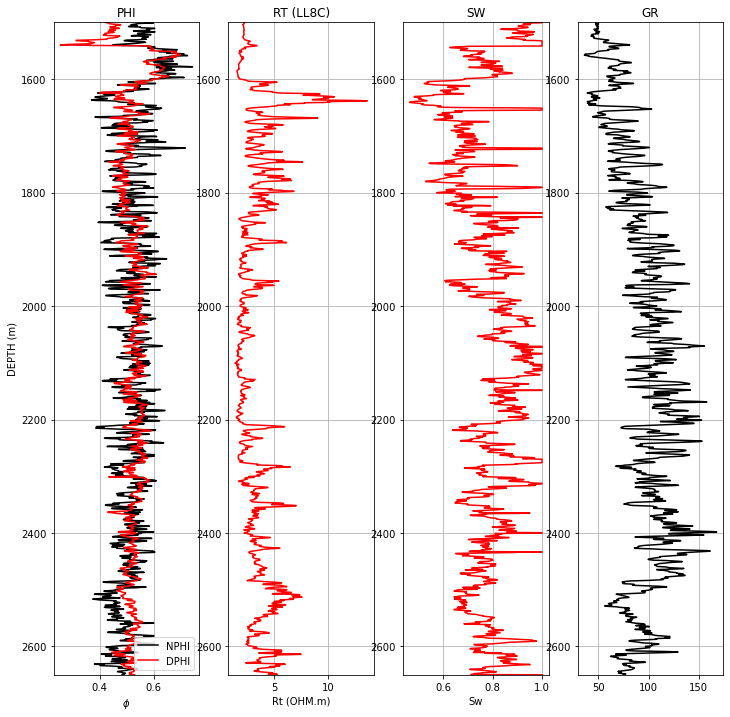

In [136]:
#Plotando para visualizar os perfis de RT, PHI e GR junto do SW
fig, ax = plt.subplots(1,4,figsize=(12,12))
ax[0].plot(well2['NPHI'],well2['Depth'],color='k')
ax[0].plot(well2['DPHI:1'],well2['Depth'],color='r')
#ax[0].plot(well2['DPHI:2'],well2['Depth'],color='b')
ax[0].set(xlabel = '$\phi$', ylabel = 'DEPTH (m)')
ax[0].title.set_text('PHI')
ax[0].grid()
ax[0].legend(labels = ['NPHI','DPHI'], loc = "lower right")
ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

#ax[1].plot(well2['ILDC'],well2['Depth'],color='k')
ax[1].plot(well2['LL8C'],well2['Depth'],color='r')
#ax[1].semilogx()
ax[1].set(xlabel = 'Rt (OHM.m)')
ax[1].title.set_text('RT (LL8C)')
ax[1].grid()
#ax[1].legend(labels = ['LL8','ILD'], loc = "upper right")
ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

#ax[2].plot(well2['SWE'],well2['Depth'],color='b')
ax[2].plot(well2['SWT'],well2['Depth'],color='r')
ax[2].set(xlabel = 'Sw')
ax[2].title.set_text('SW')
ax[2].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
ax[2].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[2].invert_yaxis()

ax[3].plot(well2['GR'],well2['Depth'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[3].title.set_text('GR')
ax[3].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
ax[3].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[3].invert_yaxis()

> * Como podemos notar, a porosidade DPHI é mais estável que a NPHI, então utilizaremos ela. No caso das resistividades, ambas seguem padrões semelhante, mas utilizaremos a LLT8, pois é uma ferramenta mais precisa pra poços dessa magnitude.

### Regressão para saturação efetiva (Swe)
> * Inicialmente vamos fazer a rede para a saturação efetiva

In [126]:
well2.columns

Index(['index', 'Depth', 'GR', 'NPHI', 'DPHI:1', 'LL8C', 'SWT'], dtype='object')

In [127]:
# Gerando os dados de entrada
x5 = well2[['NPHI','LL8C']]
y5 = well2[['SWT']]

# Como a resistividade está com valores muito acima da porosidade, temos que normalizar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x5[['NPHI','LL8C']] = scaler.fit_transform(x5[['NPHI','LL8C']])

<ipython-input-127-0ad9e741b7cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x5[['NPHI','LL8C']] = scaler.fit_transform(x5[['NPHI','LL8C']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [128]:
# Utilizando a função train_test_split (sklearn) para dividir de forma aleatória os elementos dos
# dados 
from sklearn.model_selection import train_test_split
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.2, random_state = 42)

In [129]:
# Gerando o modelo
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(75, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')                        
])

# Compiling the model
model5.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['mae'])

# Fitting the model

history5 = model5.fit(x5_train, y5_train,
                      epochs=1000, 
                      validation_data=(x5_test, y5_test), 
                      callbacks = [callback],
                      validation_split = 0.5)

Epoch 1/1000
29/29 [==============================] - 0s 4ms/step - loss: 0.1644 - mae: 0.1644 - val_loss: 0.0867 - val_mae: 0.0867
Epoch 2/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0806 - mae: 0.0806 - val_loss: 0.0659 - val_mae: 0.0659
Epoch 3/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0654 - mae: 0.0654 - val_loss: 0.0601 - val_mae: 0.0601
Epoch 4/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0616 - mae: 0.0616 - val_loss: 0.0627 - val_mae: 0.0627
Epoch 5/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0638 - mae: 0.0638 - val_loss: 0.0601 - val_mae: 0.0601
Epoch 6/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0608 - mae: 0.0608 - val_loss: 0.0607 - val_mae: 0.0607
Epoch 7/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0572 - mae: 0.0572 - val_loss: 0.0717 - val_mae: 0.0717
Epoch 8/1000
29/29 [==============================] - 0s 1ms/step - loss: 0.

In [130]:
from tensorflow.keras.utils import plot_model
plot_model(model5, show_shapes=True)
plt.savefig('model_NN.eps', format='eps')

<Figure size 432x288 with 0 Axes>

In [131]:
# Avaliando o modelo
model5.evaluate(x5_test, y5_test)

15/15 [==============================] - 0s 714us/step - loss: 0.0606 - mae: 0.0606


[0.060634009540081024, 0.060634009540081024]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


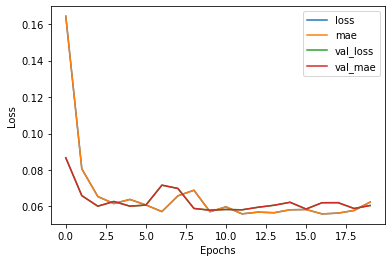

In [132]:
pd.DataFrame(history5.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('history.eps', format='eps')

In [133]:
pred5 = model5.predict(x5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


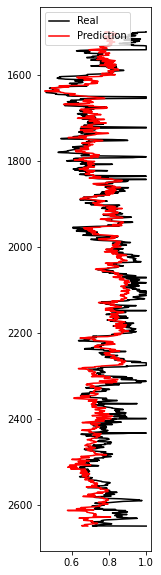

In [134]:
# Figura para comparar o dado real com o calculado
plt.figure(figsize = (2, 10))

plt.plot(well2['SWT'], well2['Depth'], color = 'k')
plt.plot(pred5, well2['Depth'], color = 'red')

plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well1['Depth'][0],well1['Depth'][len(well1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()

plt.savefig('fig1.eps', format='eps')

In [135]:
# Vamos adicionar os parâmetros Rw, m, n e depois calcular Sw
Rw = 0.03
m = 1.96
n = 2.19

well1['SW'] = ((Rw/(well1['SPHI']**m)/well1['RT_HRLT']))**n

#well1